In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
# feature(X), target(y), feature_names 분리
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

In [9]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
df_pos = df.loc[df['target']==1] # 양성종양-착한종양
df_neg = df.loc[df['target']==0] # 악성종양-나쁜종양

In [12]:
df_pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [13]:
df_pos.shape

(357, 31)

In [14]:
df_neg.shape

(212, 31)

In [15]:
df_pos.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [16]:
df_neg[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
df_sample = pd.concat([df_pos, df_neg[:5]], sort=True)

In [18]:
df_sample

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,153.400,0.049040,0.015870,0.05373,0.006193,1001.0,0.27760,0.147100,0.30010,0.07871,...,2019.0,0.66560,0.26540,0.71190,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.080,0.013080,0.013400,0.01860,0.003532,1326.0,0.07864,0.070170,0.08690,0.05667,...,1956.0,0.18660,0.18600,0.24160,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.030,0.040060,0.020580,0.03832,0.004571,1203.0,0.15990,0.127900,0.19740,0.05999,...,1709.0,0.42450,0.24300,0.45040,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.230,0.074580,0.018670,0.05661,0.009208,386.1,0.28390,0.105200,0.24140,0.09744,...,567.7,0.86630,0.25750,0.68690,0.17300,98.87,14.910,0.20980,0.6638,26.50


In [19]:
X = df_sample.drop('target', axis=1)
y = df_sample['target']

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=202,shuffle=True, stratify=y ) # stratify = 레이블, label비율 맞춰서 split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20,shuffle=True) # stratify = 레이블, label비율 맞춰서 split

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
pred_y = model_dtc.predict(X_test)
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [23]:
(pred_y == y_test).mean()

0.989010989010989

In [24]:
# 모두 양성종양으로 진단하는 데이터 구성
pred_temp = np.ones(shape=y_test.shape)
pred_temp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [25]:
pred_temp == y_test

55      True
61      True
464     True
3      False
268     True
       ...  
175     True
179     True
304     True
405     True
485     True
Name: target, Length: 91, dtype: bool

In [26]:
(pred_temp == y_test).mean()

0.989010989010989

In [27]:
pred_dtc= pred_y
# confusion_matrix 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_dtc) # (target값, 예측결과값)

array([[ 0,  1],
       [ 0, 90]])

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

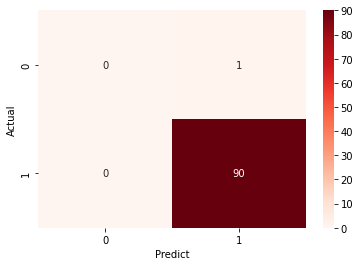

In [29]:
sns.heatmap(confusion_matrix(y_test, pred_y), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')

plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
# 정밀도 구하기
precision_score(y_test, pred_dtc)

0.989010989010989

In [32]:
90/91

0.989010989010989

In [33]:
# 재현율 구하기
recall_score(y_test, pred_dtc)

1.0

In [34]:
90/90 #TP/(TP+FN)

1.0

In [35]:
from sklearn.metrics import f1_score

In [36]:
f1 = f1_score(y_test, pred_dtc)
print('f1 스코어: {0:.4f}'.format(f1))

f1 스코어: 0.9945


In [37]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
pred_y = model_dtc.predict(X_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        90

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91



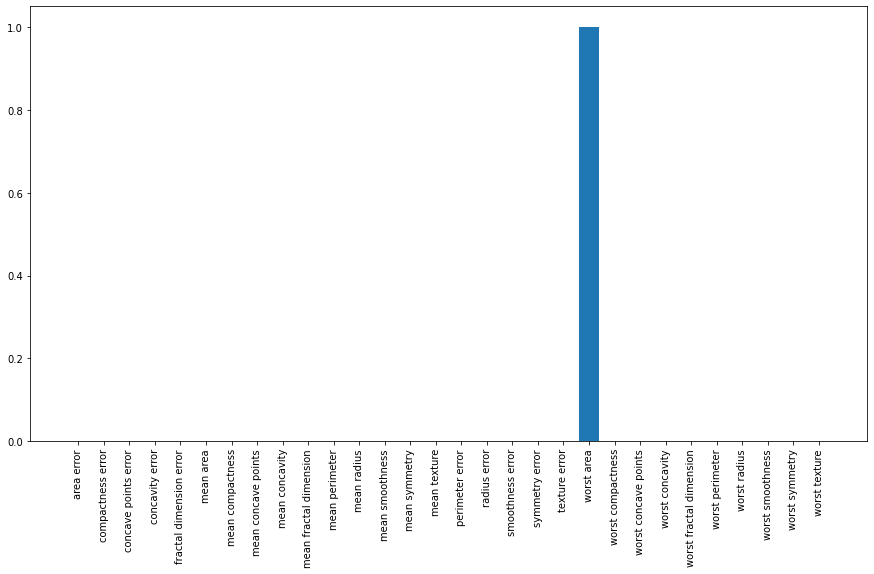

In [38]:
# 모델 학습 성능에 영향을 준 feature 확인하기
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_dtc.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [70]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
X_train,  X_test, y_train,y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target)
model_sgd = AdaBoostClassifier()
model_sgd.fit(X_train, y_train)
pred = model_sgd.predict(X_test)
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1])

In [71]:
(y_test==pred).mean()

0.956140350877193

In [72]:
y_train.shape

(455,)

In [73]:
f1 = f1_score(y_test, pred)
f1

0.965034965034965

In [74]:
confusion_matrix(y_test, pred)

array([[40,  2],
       [ 3, 69]])

In [75]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



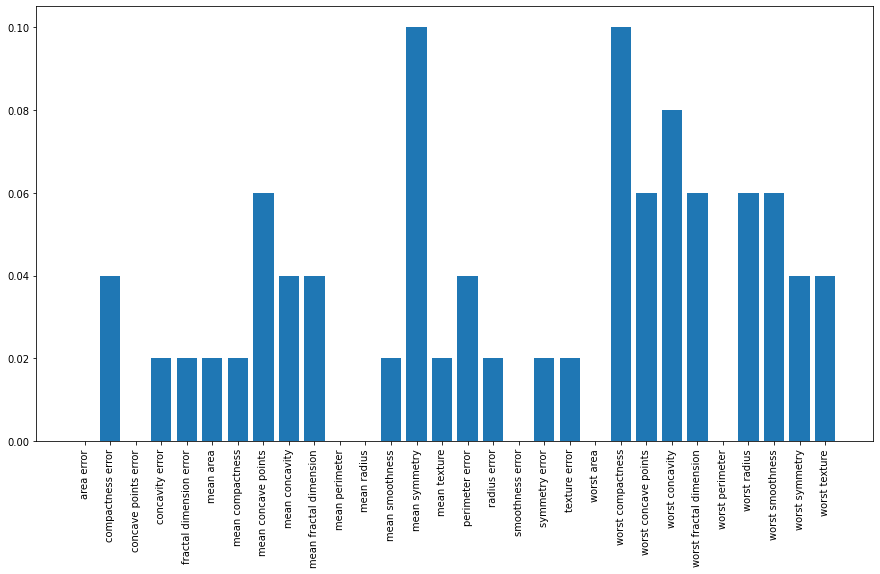

In [78]:
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_sgd.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [179]:
# from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *

model_Classifier_list = [DecisionTreeClassifier,RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, 
ExtraTreesClassifier,  GradientBoostingClassifier,# IsolationForest, RandomTreesEmbedding, StackingClassifier,
#VotingClassifier, 
HistGradientBoostingClassifier
]
model_Regressor_list = [AdaBoostRegressor, BaggingRegressor,
ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor, VotingRegressor,
HistGradientBoostingRegressor, 
]
class Classifier_Report:
    def __init__(self, model_list):
        self.model_list = model_list
        self.accuracy_dict = dict()


    def classifier_report(self, data,target,test_rate = 0.2, shuffle = True):
        figure,ax_list_list =plt.subplots(3,len(self.model_list)//3+1)
        ax_list = ax_list_list.reshape(9)
        # print("#"*100+"\n",model_name.__name__,end="\n\n")
        for idx, model_name in enumerate(self.model_list):
            X_train,  X_test, y_train,y_test = train_test_split(data, target, test_size=test_rate, shuffle=shuffle, stratify=target)
            model = model_name()
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            # print("Prediction : ",pred)
            # print("Accuracy: ",(y_test==pred).mean())
            # print("F1 Score: ",f1_score(y_test, pred))
            # print("="*100,"\n\nClassification_report")
            # print(classification_report(y_test, pred))
            # fig = plt.figure(figsize=(30,15))
            # fig.suptitle(model_name.__name__)
            sns.barplot(X.columns, model_sgd.feature_importances_, ax=ax_list[idx])
            # sns.barplot(X.columns, model_sgd.feature_importances_)
            plt.xticks(rotation=90)
            self.accuracy_dict[model_name.__name__]=f1_score(y_test, pred)
            print(y_test)
        # plt.tight_layout()
        plt.show()

    def f1_report(self):
        for k, v in self.accuracy_dict.items():
            print("{:40} : ".format(k), "%.2f"%v)



[0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0
 1 1 1]
[1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1
 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 0 1 1]
[1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0
 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1]
[0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1
 0 1 1]
[1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0

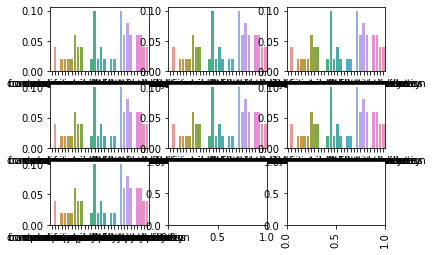

In [180]:
cr = Classifier_Report(model_Classifier_list)
cr.classifier_report(data, target)

In [178]:
cr.f1_report()

DecisionTreeClassifier                   :  0.94
RandomForestClassifier                   :  0.97
AdaBoostClassifier                       :  0.98
BaggingClassifier                        :  0.99
ExtraTreesClassifier                     :  0.97
GradientBoostingClassifier               :  0.99
HistGradientBoostingClassifier           :  0.97


In [172]:
k="hi"
print("{:<10}".format(k))

hi        
